# Assignment 5 - Recommender System and NN with numpy

In [27]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
# from scipy.spatial.distance import cosine
from sklearn.datasets import make_gaussian_quantiles
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/Users/parthbansal/Downloads/radio_songs.csv')

In [23]:
df.sample(5, random_state = 42)

,abba,ac/dc,adam green,aerosmith,afi,air,alanis morissette,alexisonfire,alicia keys,all that remains,...,timbaland,tom waits,tool,tori amos,travis,trivium,u2,underoath,volbeat,yann tiersen
user,,,,,,,,,,,,,,,,,,,,,
1381,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
953,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1207,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
890,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
876,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# 100 users, 284 songs 
df.shape

(100, 284)

In [5]:
df.dtypes

abba            int64
ac/dc           int64
adam green      int64
aerosmith       int64
afi             int64
                ...  
trivium         int64
u2              int64
underoath       int64
volbeat         int64
yann tiersen    int64
Length: 284, dtype: object

In [6]:
df.set_index('user', inplace=True)
# songs = df.drop('user', axis = 1)

In [7]:
# matrix = songs.values

In [8]:
# song_index = {song_names[i]: i for i in range(len(song_names))}

## Collaborative Filtering

In [9]:
# Compute cosine similarity
similar = pd.DataFrame(cosine_similarity(df.T), columns = df.columns, index = df.columns).reset_index()

In [10]:
# A. Recommend 10 songs to users who have listened to 'u2' and 'pink floyd'.
similar.nlargest(10, 'u2', keep='last').iloc[1:][['index', 'u2']].reset_index(drop = True)

,index,u2
0,robbie williams,0.500000
1,misfits,0.500000
2,green day,0.433013
3,depeche mode,0.408248
4,peter fox,0.377964
5,madonna,0.353553
6,kelly clarkson,0.353553
7,johnny cash,0.353553
8,enter shikari,0.353553


In [11]:
similar.loc[similar['index'] != 'pink floyd', ['index', 'pink floyd']].nlargest(10, 'pink floyd').reset_index(drop = True)

,index,pink floyd
0,genesis,0.577350
1,david bowie,0.408248
2,funeral for a friend,0.408248
3,hans zimmer,0.408248
4,led zeppelin,0.408248
5,queen,0.408248
6,sonic syndicate,0.408248
7,coldplay,0.348155
8,bob dylan,0.333333
9,howard shore,0.333333


In [12]:
# B. Find user most similar to user 1606.
users = pd.DataFrame(cosine_similarity(df), index = df.index, columns = df.index).reset_index()
users.head()

user,user,1,33,42,51,62,75,130,141,144,...,1521,1530,1536,1545,1549,1566,1586,1589,1601,1606
0,1,1.000000,0.061546,0.000000,0.000000,0.083624,0.000000,0.0,0.000000,0.000000,...,0.1066,0.0,0.000000,0.190693,0.000000,0.0,0.000000,0.000000,0.000000,0.0
1,33,0.061546,1.000000,0.077152,0.247537,0.226455,0.176777,0.0,0.000000,0.000000,...,0.0000,0.0,0.064550,0.193649,0.000000,0.0,0.045644,0.000000,0.091287,0.0
2,42,0.000000,0.077152,1.000000,0.000000,0.000000,0.000000,0.0,0.091670,0.000000,...,0.0000,0.0,0.000000,0.000000,0.094491,0.0,0.000000,0.125988,0.000000,0.0
3,51,0.000000,0.247537,0.000000,1.000000,0.336336,0.140028,0.0,0.000000,0.108465,...,0.0000,0.0,0.076696,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
4,62,0.083624,0.226455,0.000000,0.336336,1.000000,0.160128,0.0,0.067267,0.124035,...,0.0000,0.0,0.175412,0.087706,0.000000,0.0,0.062017,0.000000,0.000000,0.0


In [13]:
most_similar = users.iloc[:, 1:].corrwith(users[1606]).sort_values(ascending=False)[1:2].index[0]
print(f'Most similar user: {most_similar}')

Most similar user: 1144


In [26]:
# C. How many of the recommended songs has already been listened to by user 1606?
songs_1606 = df[df.index == 1606].T[df[df.index == 1606].T[1606] == 1].index.values
songs_1144 = df[df.index == 1144].T[df[df.index == 1144].T[1144] == 1].index.values
print(len(np.intersect1d(songs_1144, songs_1606)))

2


In [65]:
# D. Use a combination of user-item approach to build a recommendation score for each song for each user using the following steps for each user-
users = df.index
songs = df.columns        

In [61]:
recommendations = pd.DataFrame(columns = ['user', 'song', 'score'])

In [66]:
# Define function to calculate recommendation score
def get_recommendation_score(user, song):
    songs_listened_by_user = df.loc[user, df.loc[user] == 1].index.values
    if song in songs_listened_by_user:
        return -1
    else:
        similar_songs = similar[['index', song]].sort_values(song, ascending=False)[1:11]
        rec_score = (df.loc[user, similar_songs['index']] * similar_songs[song].values).sum() / similar_songs[song].values.sum()
        return rec_score

In [67]:
recommendations = pd.concat([pd.DataFrame({'user': user, 'song': songs, 'score': songs.map(lambda song: get_recommendation_score(user, song))}) for user in users], ignore_index=True)

In [70]:
recommendations = recommendations.reset_index(drop = True)

In [75]:
recommendations[recommendations['user'] == 1606].sort_values('score', ascending = False).head(5).reset_index(drop = True)

,user,song,score
0,1606,eric clapton,0.202740
1,1606,howard shore,0.171749
2,1606,david bowie,0.171243
3,1606,dream theater,0.134501
4,1606,apocalyptica,0.106527


## Conceptual Questions

**Name 2 other similarity measures that you can use instead of cosine similarity above.**
- Euclidean Distance, Jaccard similarity, Pearson Correlation Coefficient 

**What is needed to build a Content-Based Recommender system?**
- To build a Content-Based Recommender system, you need information about the content of the items being recommended (such as descriptions or features), and data about how users have interacted with those items in the past.

**Name 2 methods to evaluate your recommender system.**
- A/B Testing, Precision and Recall

## Neural Network using numpy

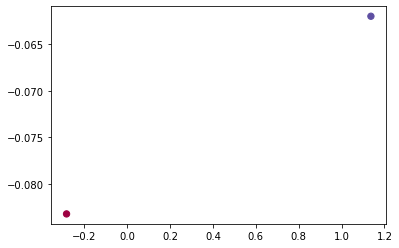

In [39]:
samples = 2
def load_extra_datasets(N):  
    gaussian_quantiles = make_gaussian_quantiles(mean=None, 
                                                 cov=0.7, 
                                                 n_samples=N, 
                                                 n_features=2, 
                                                 n_classes=2,  
                                                 shuffle=True, 
                                                 random_state=None)
    return  gaussian_quantiles

gaussian_quantiles= load_extra_datasets(samples)

X, Y = gaussian_quantiles

X, Y = X.T, Y.reshape(1, Y.shape[0])

plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

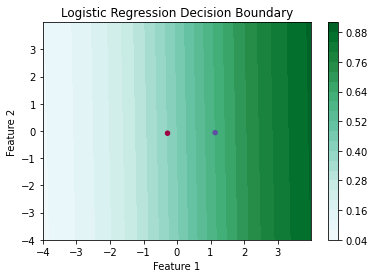

Accuracy of logistic regression: 100 % (percentage of correctly labelled datapoints)


In [40]:
xx, yy = np.mgrid[-4:4:.01, -4:4:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
#probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)
clf=LogisticRegression()

clf.fit(X.T, Y.T)

probs = clf.predict_proba(grid)[:, 1]
probs = probs.reshape(xx.shape)

plt.contourf(xx, yy, probs, 25, cmap="BuGn", vmin=0, vmax=1)
plt.colorbar()
plt.scatter(X[0, :], X[1, :], c=Y, s=20, cmap=plt.cm.Spectral)
plt.title("Logistic Regression Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

In [41]:
n_x = X.shape[0] # size of input layer`
n_h = 4
n_y = Y.shape[0] # size of output layer

print(n_x, n_y)

2 1


In [51]:
W1 = np.random.randn(n_h,n_x) * 0.01 #4x2
b1 = np.zeros(shape=(n_h, 1)) #4x1
W2 = np.random.randn(n_y,n_h) * 0.01 #1x4
b2 = np.zeros(shape=(n_y, 1))#1x1

print("W1\n", W1)
print("b1\n", b1)
print("W2\n", W2)
print("b2\n", b2)

W1
 [[ 0.01513794  0.00406448]
 [ 0.01028502 -0.00320395]
 [ 0.0022025   0.01375812]
 [-0.00136244  0.01534806]]
b1
 [[0.]
 [0.]
 [0.]
 [0.]]
W2
 [[ 0.00327721  0.00490679  0.00079976 -0.00283219]]
b2
 [[0.]]


In [43]:
def sigmoid(x):
    return 1 / (1 + np.e ** -x)

total_cost = -9999

# Implement Forward Propagation to calculate A2 (probabilities)
Z1 = np.dot(W1,X) + b1
A1 = np.tanh(Z1)
Z2 = np.dot(W2,A1) + b2
A2 = sigmoid(Z2) # Final output prediction

print(b2)

[[0.]]


In [44]:
# Compute the cross-entropy cost
samples=2
old_total_cost = total_cost
cost_function = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2)) #J(theta)
total_cost = -np.sum(cost_function) / samples

print("cost=", total_cost)
print("cost delta=", np.subtract(total_cost, old_total_cost))

cost= 0.6932593700589595
cost delta= 9999.693259370059


In [45]:
print(Z1.shape)
print(A1.shape)
print(Z2.shape)
print(A2.shape)
print(cost_function.shape)

(4, 2)
(4, 2)
(1, 2)
(1, 2)
(1, 2)


In [52]:
dJdZ2 = A2 - Y
dJdW2 = (1 / samples) * np.dot(dJdZ2, A1.T)
dJdb2 = (1 / samples) * np.sum(dJdZ2, axis=1, keepdims=True)
# since activation function is tanh(Z1) = A1
# first derivative of d/dz tanh(z) = 1 - tanh(z) ^ 2 = 1 - A1 ^ 2
dJdZ1 = np.multiply(np.dot(W2.T, dJdZ2), 1 - np.power(A1, 2))
dJdW1 = (1 / samples) * np.dot(dJdZ1, X.T)
dJdb1 = (1 / samples) * np.sum(dJdZ1, axis=1, keepdims=True)

print("dJdZ2=", dJdZ2)
print("dJdW2=", dJdW2)
print("dJdb2=", dJdb2)
print("dJdW1=", dJdW1)
print("dJdb1=", dJdb1)

dJdZ2= [[-0.50008432  0.50000467]]
dJdW2= [[ 0.00292516 -0.00057385  0.0049446  -0.00644669]]
dJdb2= [[-3.982668e-05]]
dJdW1= [[-1.16402302e-03 -1.73419186e-05]
 [-1.74296735e-03 -2.59578284e-05]
 [-2.84024729e-04 -4.23410062e-06]
 [ 1.00564818e-03  1.50030174e-05]]
dJdb1= [[-4.54272495e-08]
 [-1.86469192e-07]
 [ 2.21701239e-08]
 [-2.21719171e-07]]


In [53]:
learning_rate = 0.0001
b2_old = b2
print("b2 before=", b2_old)
W1 = W1 - learning_rate * dJdW1
b1 = b1 - learning_rate * dJdb1
W2 = W2 - learning_rate * dJdW2
b2 = b2 - learning_rate * dJdb2

print("b2 after=", b2)

print("delta change=", np.subtract(b2, b2_old))

b2 before= [[0.]]
b2 after= [[3.982668e-09]]
delta change= [[3.982668e-09]]


In [54]:
learning_rate = 0.01
#b2_old = b2
print("b2 before=", b2_old)
W1 = W1 - learning_rate * dJdW1
b1 = b1 - learning_rate * dJdb1
W2 = W2 - learning_rate * dJdW2
b2 = b2 - learning_rate * dJdb2

print("b2 after=", b2)

print("delta change=", np.subtract(b2, b2_old))

b2 before= [[0.]]
b2 after= [[4.02249468e-07]]
delta change= [[4.02249468e-07]]


In [55]:
learning_rate = 1
#b2_old = b2
print("b2 before=", b2_old)
W1 = W1 - learning_rate * dJdW1
b1 = b1 - learning_rate * dJdb1
W2 = W2 - learning_rate * dJdW2
b2 = b2 - learning_rate * dJdb2

print("b2 after=", b2)

print("delta change=", np.subtract(b2, b2_old))

b2 before= [[0.]]
b2 after= [[4.02289295e-05]]
delta change= [[4.02289295e-05]]


In [56]:
#for 10 iterations
for i in range(10):
    dJdZ2 = A2 - Y
    dJdW2 = (1 / samples) * np.dot(dJdZ2, A1.T)
    dJdb2 = (1 / samples) * np.sum(dJdZ2, axis=1, keepdims=True)
    # since activation function is tanh(Z1) = A1
    # first derivative of d/dz tanh(z) = 1 - tanh(z) ^ 2 = 1 - A1 ^ 2
    dJdZ1 = np.multiply(np.dot(W2.T, dJdZ2), 1 - np.power(A1, 2))
    dJdW1 = (1 / samples) * np.dot(dJdZ1, X.T)
    dJdb1 = (1 / samples) * np.sum(dJdZ1, axis=1, keepdims=True)

 
    
    learning_rate = 0.01
    b2_old = b2
    print("b2 before=", b2_old)
    W1 = W1 - learning_rate * dJdW1
    b1 = b1 - learning_rate * dJdb1
    W2 = W2 - learning_rate * dJdW2
    b2 = b2 - learning_rate * dJdb2

    print("b2 after=", b2)

    print("delta change=", np.subtract(b2, b2_old))
    # Update variables for next iteration
    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2) # Final output prediction
    old_total_cost = total_cost
    cost_function = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2)) #J(theta)
    total_cost = -np.sum(cost_function) / samples
    print("cost=", total_cost)
    print("cost delta=", np.subtract(total_cost, old_total_cost))

b2 before= [[4.02289295e-05]]
b2 after= [[4.06271963e-05]]
delta change= [[3.982668e-07]]
cost= 0.6931289151706674
cost delta= -0.00010725602580274884
b2 before= [[4.06271963e-05]]
b2 after= [[4.04673612e-05]]
delta change= [[-1.59835022e-07]]
cost= 0.6931283012171096
cost delta= -6.139535578819633e-07
b2 before= [[4.04673612e-05]]
b2 after= [[4.03061056e-05]]
delta change= [[-1.61255612e-07]]
cost= 0.6931276863276652
cost delta= -6.148894443613884e-07
b2 before= [[4.03061056e-05]]
b2 after= [[4.01434301e-05]]
delta change= [[-1.62675498e-07]]
cost= 0.693127070471347
cost delta= -6.158563181646315e-07
b2 before= [[4.01434301e-05]]
b2 after= [[3.99793354e-05]]
delta change= [[-1.64094775e-07]]
cost= 0.6931264536171202
cost delta= -6.168542268092381e-07
b2 before= [[3.99793354e-05]]
b2 after= [[3.98138218e-05]]
delta change= [[-1.65513536e-07]]
cost= 0.6931258357339005
cost delta= -6.178832197001327e-07
b2 before= [[3.98138218e-05]]
b2 after= [[3.96468899e-05]]
delta change= [[-1.6693187